In [37]:
import pandas as pd

df = pd.read_csv('/content/lung.csv')


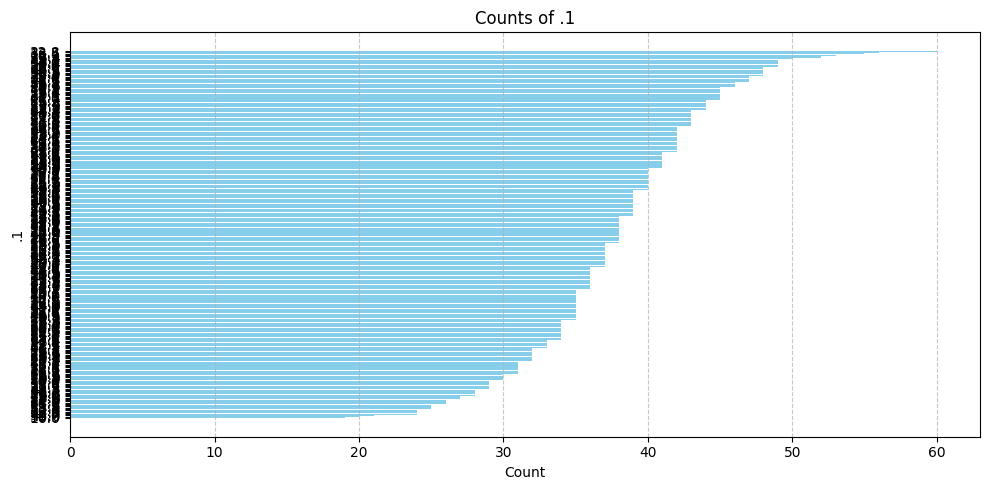

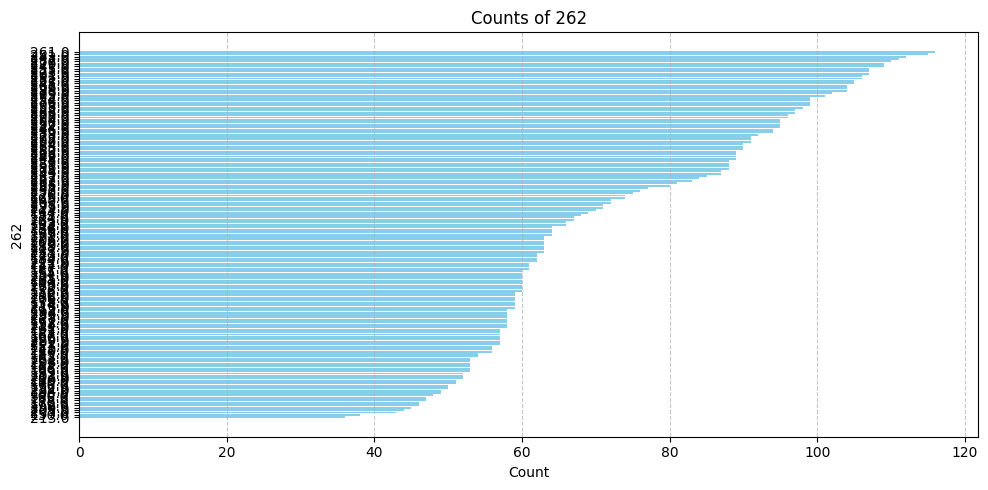

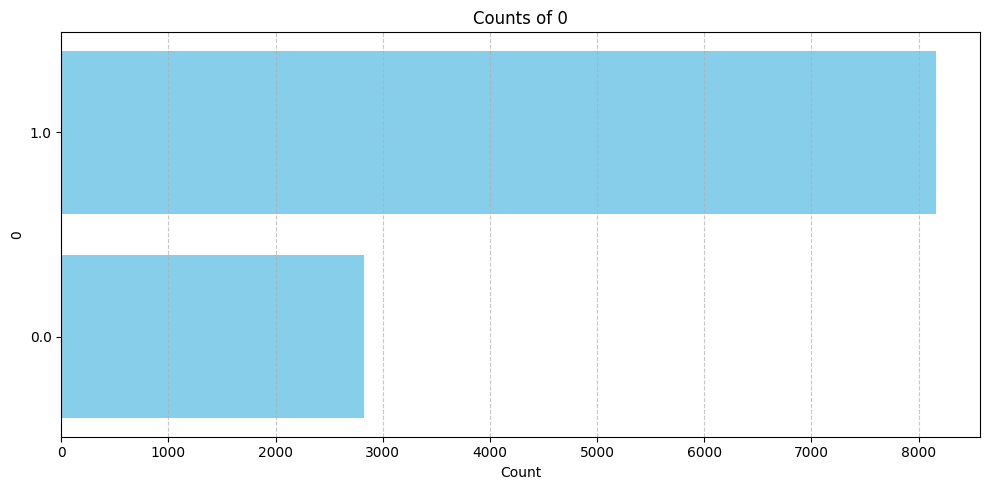

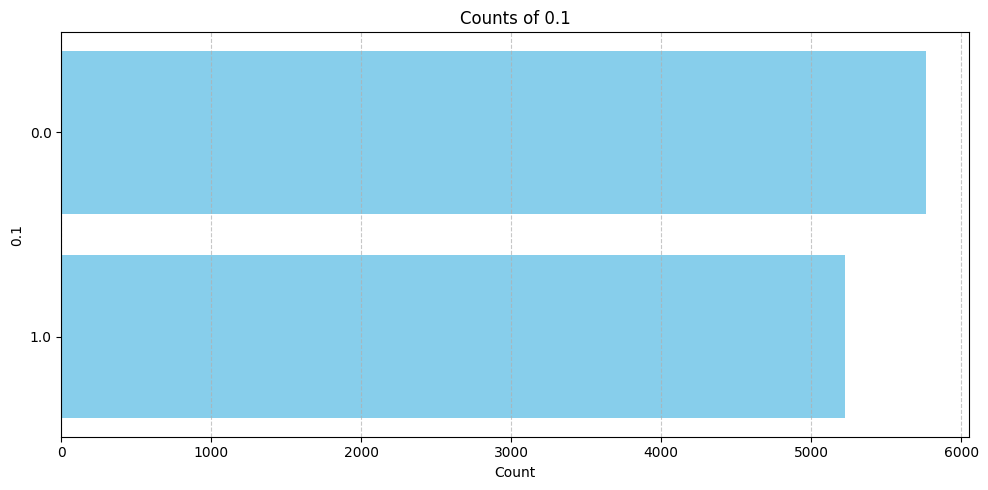

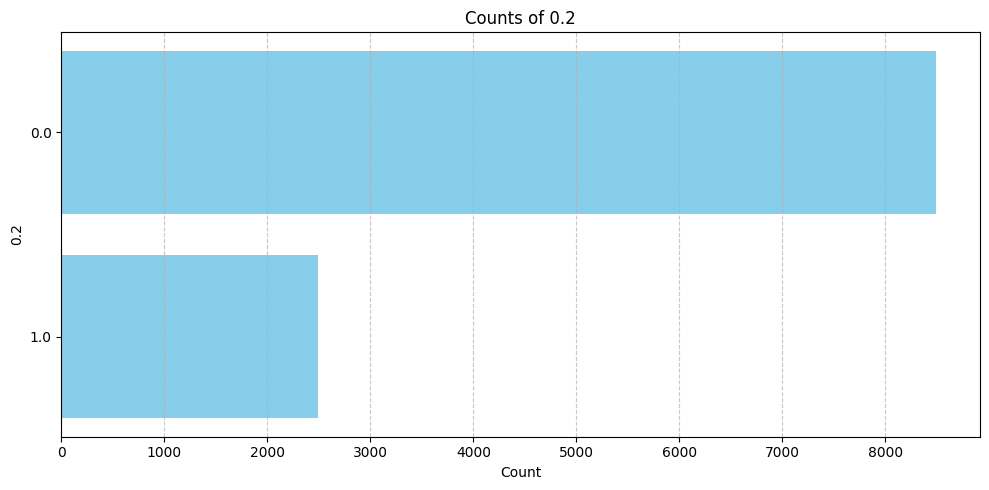

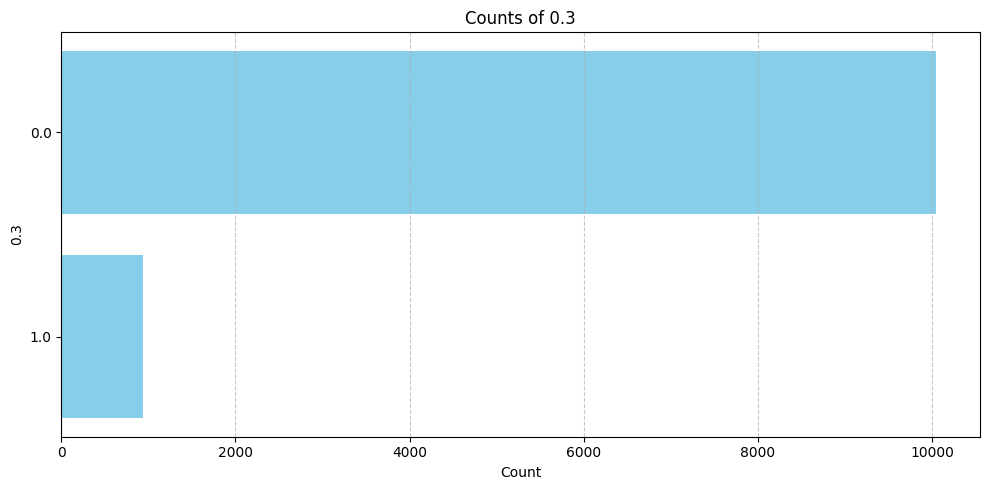

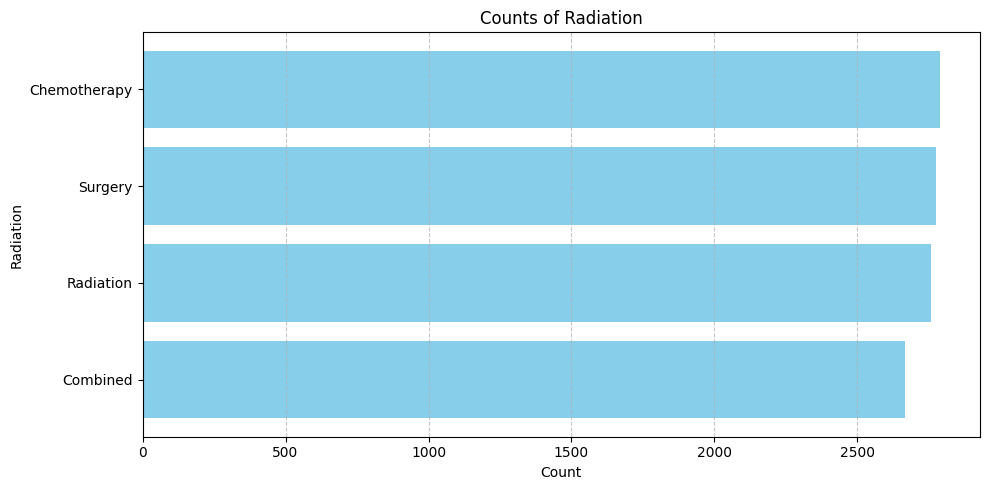

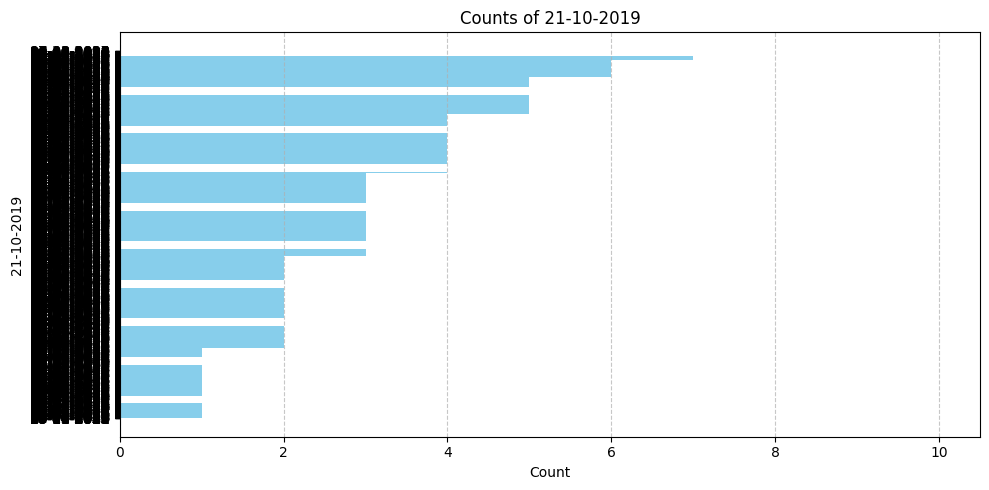

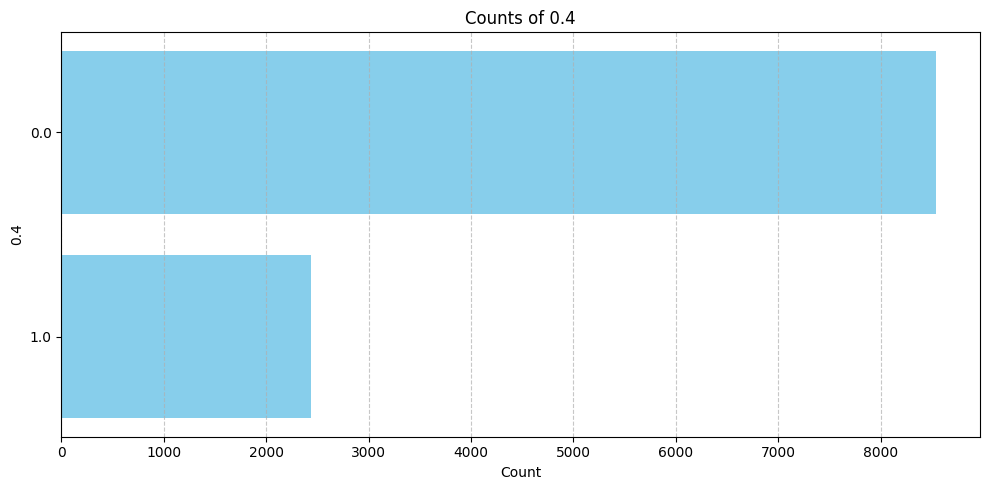

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/lung.csv')

for col in df.columns:
    counts = df[col].value_counts()

    plt.figure(figsize=(10, 5))
    plt.barh(counts.index.astype(str), counts.values, color='skyblue')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.title(f'Counts of {col}')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()




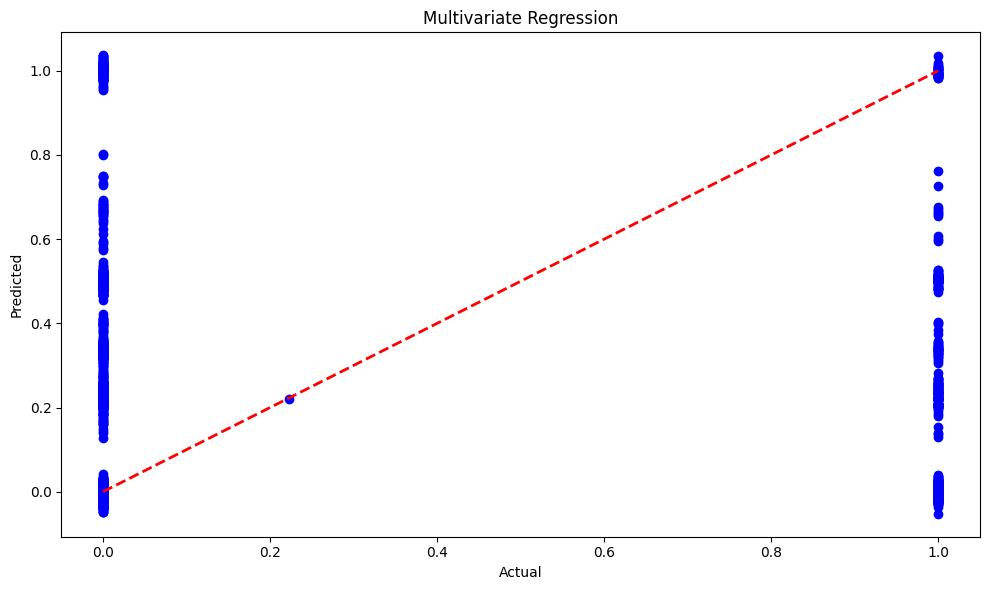

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer # Import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

df = pd.read_csv('/content/lung.csv')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

numerical_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(include='object').columns

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)


model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])


y = pd.to_numeric(y, errors='coerce')
if y.isnull().any():
    y = y.fillna(y.mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Multivariate Regression')
plt.tight_layout()
plt.show()

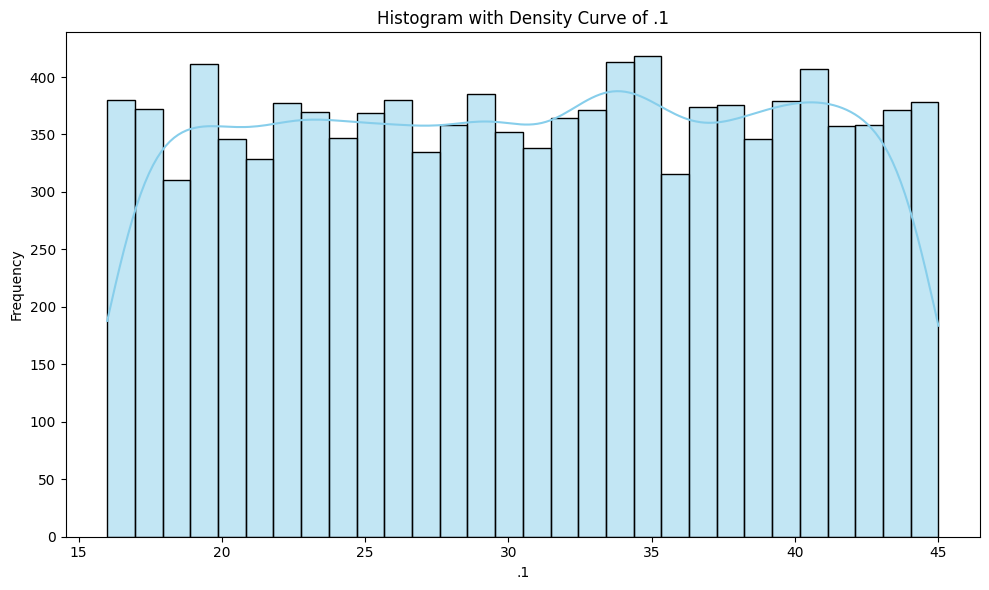

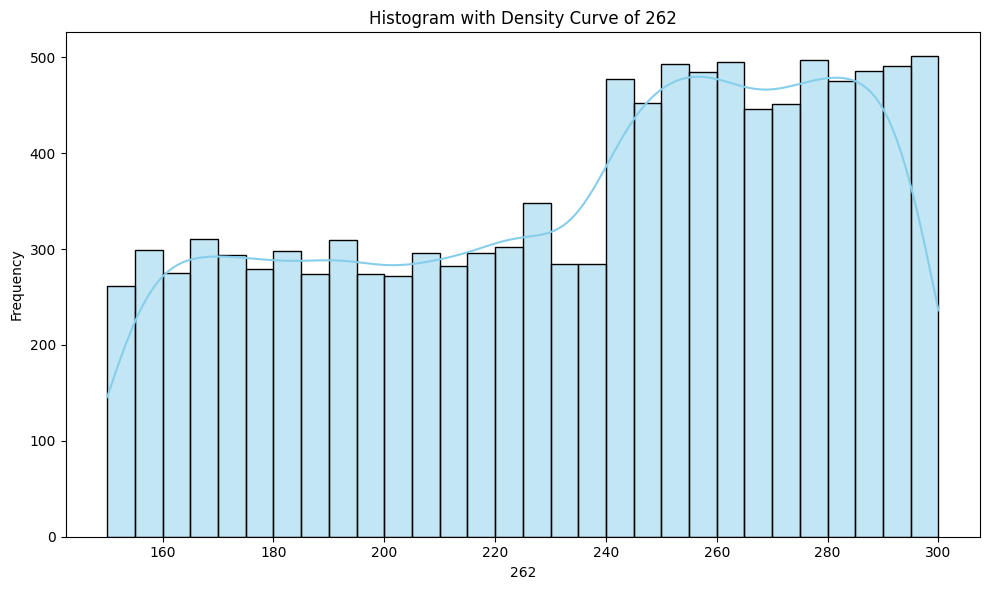

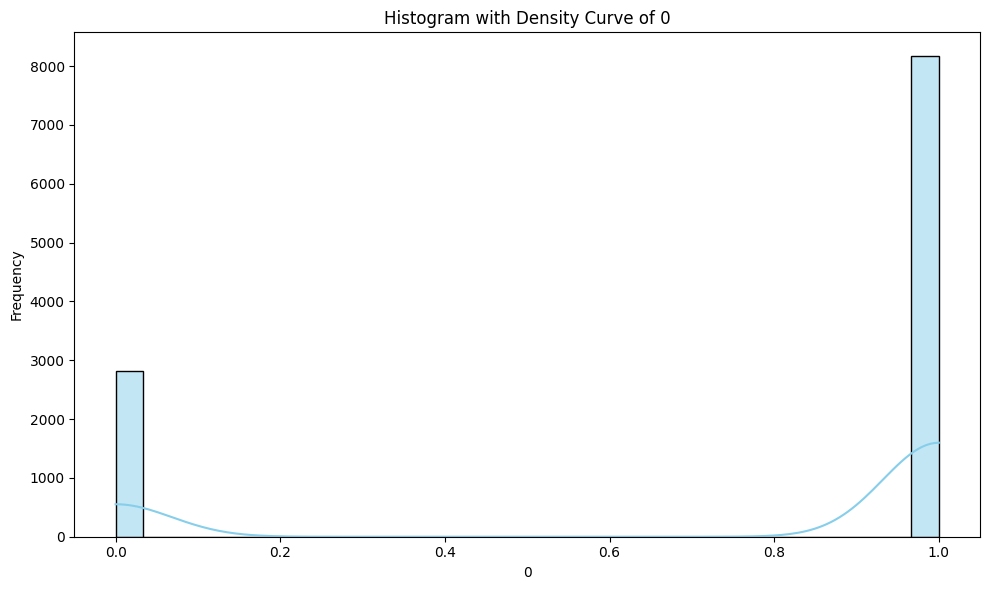

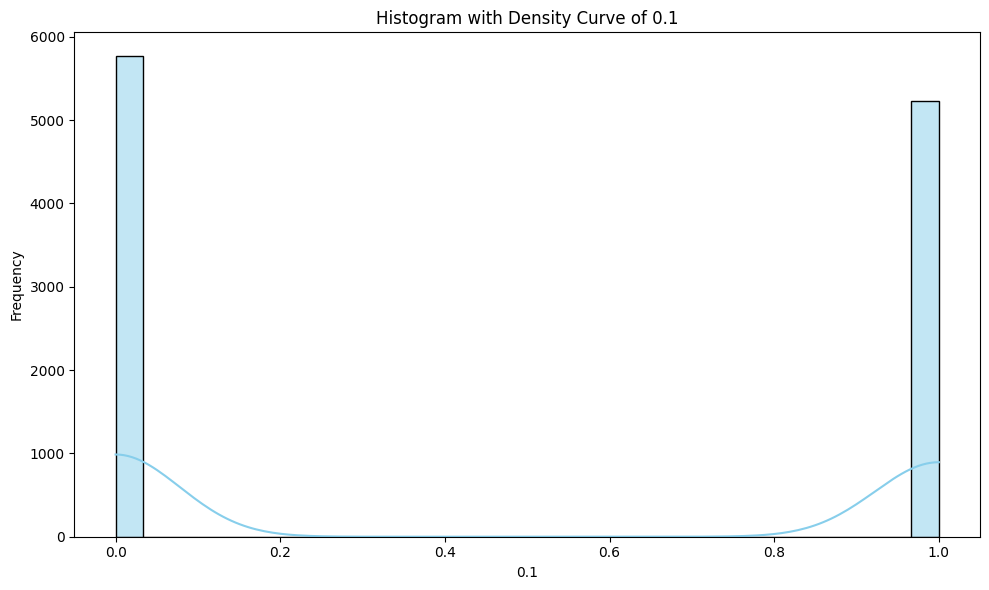

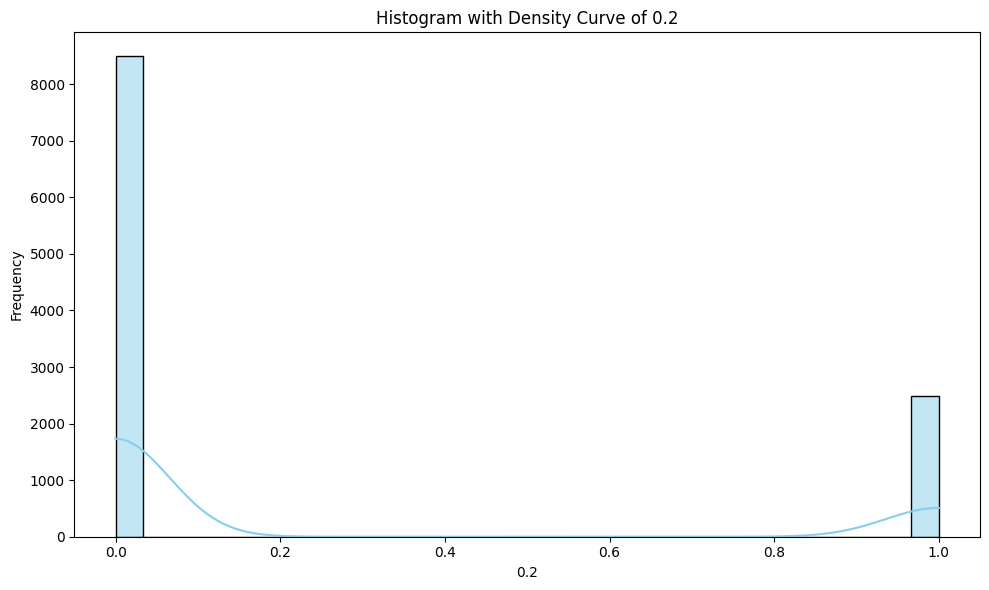

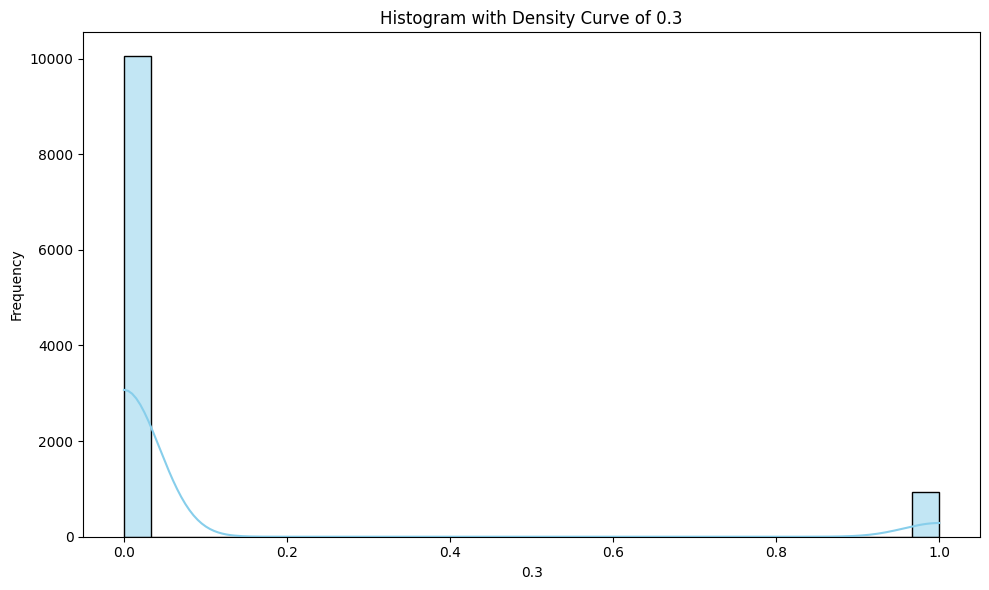

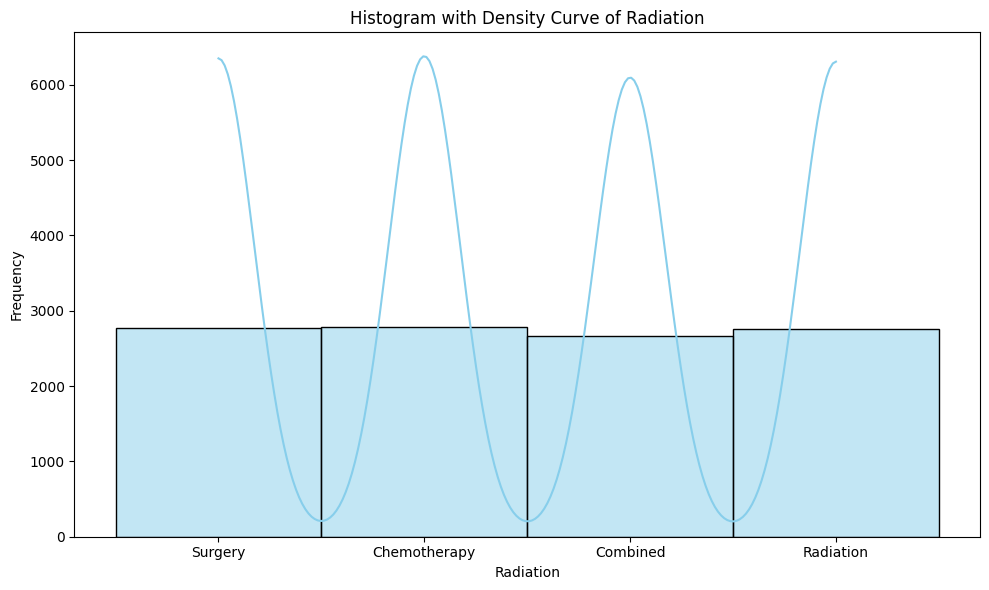

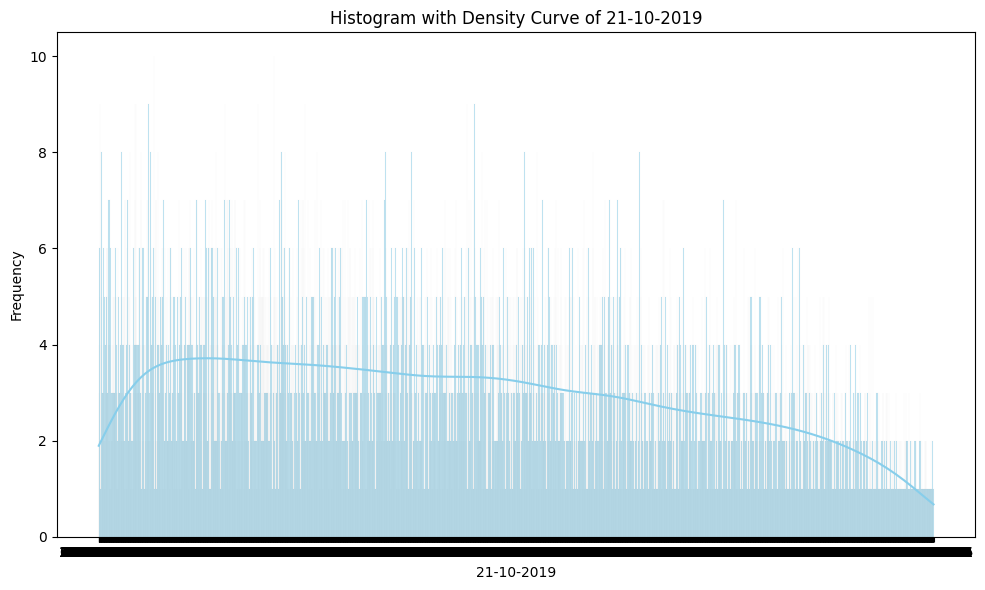

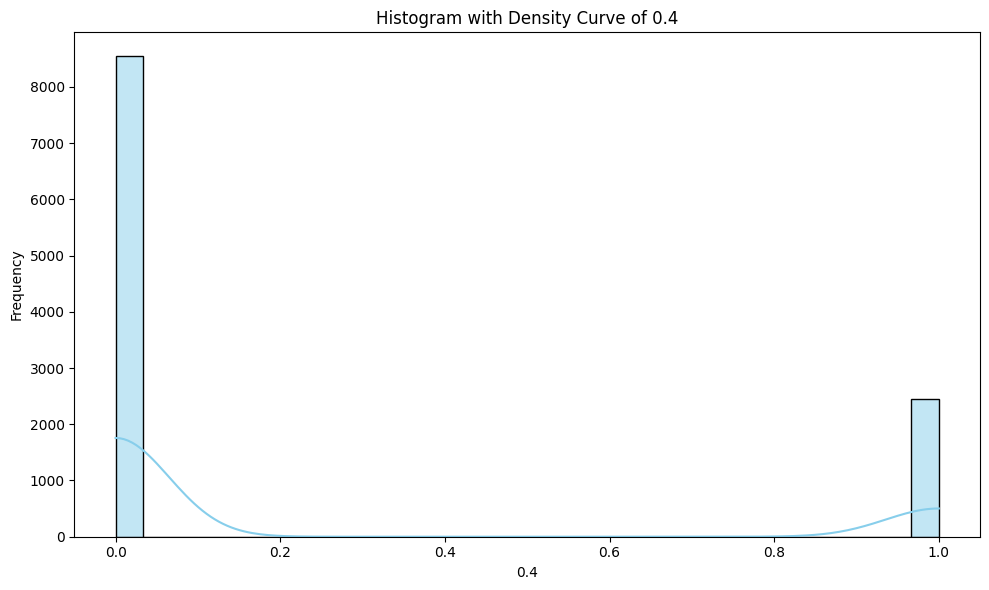

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/lung.csv')

for col in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, color='skyblue', bins=30)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram with Density Curve of {col}')
    plt.tight_layout()
    plt.show()
